In [1]:
import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display

import utils
plt.rcParams['figure.figsize'] = (13, 5)

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from collections import Counter
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from scipy import interp
from itertools import cycle
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cityblock
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix
from scipy.spatial.distance import cdist
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation
from tslearn.clustering import TimeSeriesKMeans
import numpy as np
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\clustering\kmeans.py:16: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  warnings.warn(


In [2]:
df = pd.read_csv('data/fma_metadata/ts_normal_Fede.csv',index_col=[0])

df

,0,1,2,3,4,5,6,7,8,9,...,647,648,649,650,651,652,653,654,655,656
track_id,,,,,,,,,,,,,,,,,,,,,
2,-0.134461,1.091443,2.611349,2.097392,0.735365,0.544687,0.961243,0.489815,0.678479,0.583783,...,1.659076,0.728619,1.144180,1.641569,1.646186,1.155188,0.243829,-1.270410,-1.418964,-1.378548
5,-0.915597,-0.890180,-1.271114,-1.254090,0.034274,0.782003,0.836597,-0.421936,-0.856411,-0.172586,...,0.986330,0.646999,0.348132,-0.214028,0.523669,0.599232,0.826596,1.141205,1.416961,1.107621
148,-1.398620,-1.179364,-0.760749,-0.668556,-0.215774,-0.222921,-0.153197,0.265194,0.854607,1.257842,...,0.799620,0.773268,0.810048,0.704623,0.624920,0.619605,0.644483,0.689480,0.706873,0.508055
182,0.831877,0.867620,1.211251,1.300045,1.009059,0.776468,1.445092,1.928781,2.086341,1.679941,...,-0.231961,0.177564,0.976858,1.312150,0.890539,0.194135,0.318079,0.535572,0.486992,0.594535
255,-0.001086,-0.109745,-0.149553,-0.249814,-0.338598,-0.294437,-0.167429,-0.541922,-0.708239,-1.260999,...,-0.579852,-1.053090,-1.056643,-0.359074,0.243012,0.159436,-0.013340,-0.244169,-0.727907,-1.238562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154306,-1.110754,-1.006785,-0.815322,-0.789090,-0.743797,-0.657886,-0.834670,-1.228586,-1.459256,-1.172778,...,-0.597113,-1.080429,1.155361,1.460806,-0.275518,0.091648,0.024073,-0.617410,-1.290487,-1.266442
154307,-0.476355,-0.345470,0.423441,0.826796,0.759305,0.680591,0.419693,0.143946,-0.250479,-0.323848,...,-0.987883,-1.031161,-0.967002,-0.190268,-0.372293,-0.532872,-0.863057,-1.194852,-1.370949,-1.208573
154308,-1.461760,-1.352874,-0.667393,0.180564,-0.043601,-0.641125,-0.769813,-0.651408,1.364934,2.620067,...,1.482417,1.187887,0.431956,-0.469773,-0.895047,-0.669839,-0.516315,-0.603362,-0.740841,-0.866379


In [3]:
#cols =np.arange(start=0, stop=4, step=1)
#df.drop(df.columns[cols],axis=1,inplace=True)
#df

In [4]:
Prova=df.iloc[:2]

In [5]:
Prova

,0,1,2,3,4,5,6,7,8,9,...,647,648,649,650,651,652,653,654,655,656
track_id,,,,,,,,,,,,,,,,,,,,,
2,-0.134461,1.091443,2.611349,2.097392,0.735365,0.544687,0.961243,0.489815,0.678479,0.583783,...,1.659076,0.728619,1.144180,1.641569,1.646186,1.155188,0.243829,-1.270410,-1.418964,-1.378548
5,-0.915597,-0.890180,-1.271114,-1.254090,0.034274,0.782003,0.836597,-0.421936,-0.856411,-0.172586,...,0.986330,0.646999,0.348132,-0.214028,0.523669,0.599232,0.826596,1.141205,1.416961,1.107621


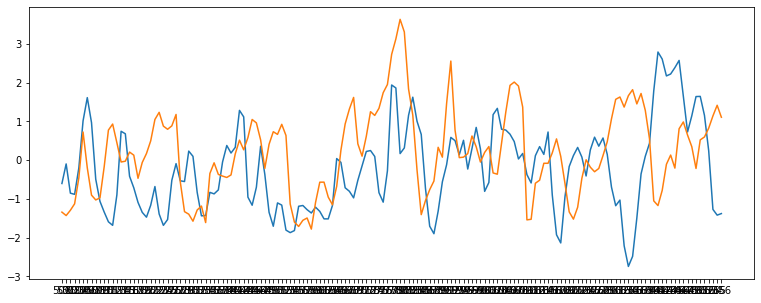

In [6]:
plt.plot(Prova.T[500:1400])
plt.show()

In [7]:
dist = euclidean(Prova.iloc[0],Prova.iloc[1])
dist

37.29310281449713

In [8]:
dist = cityblock(Prova.iloc[0],Prova.iloc[1])
dist

753.6821036562319

In [9]:
dist = dtw(Prova.iloc[0],Prova.iloc[1])
dist

14.617743684111998

In [10]:
Prova.iloc[0]

0     -0.134461
1      1.091443
2      2.611349
3      2.097392
4      0.735365
         ...   
652    1.155188
653    0.243829
654   -1.270410
655   -1.418964
656   -1.378548
Name: 2, Length: 657, dtype: float64

In [11]:
Prova[0:1]

,0,1,2,3,4,5,6,7,8,9,...,647,648,649,650,651,652,653,654,655,656
track_id,,,,,,,,,,,,,,,,,,,,,
2,-0.134461,1.091443,2.611349,2.097392,0.735365,0.544687,0.961243,0.489815,0.678479,0.583783,...,1.659076,0.728619,1.14418,1.641569,1.646186,1.155188,0.243829,-1.27041,-1.418964,-1.378548


In [12]:
path, dist = dtw_path(Prova.iloc[0],Prova.iloc[1])

In [13]:
path

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (2, 20),
 (3, 20),
 (4, 21),
 (5, 22),
 (6, 22),
 (7, 22),
 (8, 22),
 (9, 22),
 (10, 23),
 (11, 24),
 (12, 25),
 (13, 26),
 (14, 27),
 (15, 27),
 (16, 28),
 (17, 29),
 (17, 30),
 (18, 31),
 (19, 32),
 (19, 33),
 (20, 34),
 (20, 35),
 (20, 36),
 (21, 37),
 (22, 38),
 (23, 39),
 (24, 40),
 (25, 41),
 (26, 42),
 (27, 43),
 (28, 43),
 (29, 43),
 (30, 43),
 (31, 44),
 (32, 45),
 (32, 46),
 (33, 47),
 (34, 48),
 (35, 48),
 (36, 48),
 (37, 48),
 (38, 48),
 (39, 48),
 (40, 48),
 (41, 48),
 (42, 48),
 (43, 48),
 (44, 49),
 (44, 50),
 (44, 51),
 (44, 52),
 (44, 53),
 (44, 54),
 (44, 55),
 (44, 56),
 (44, 57),
 (45, 58),
 (45, 59),
 (45, 60),
 (45, 61),
 (45, 62),
 (45, 63),
 (46, 64),
 (46, 65),
 (46, 66),
 (46, 67),
 (47, 68),
 (48, 68),
 (49, 68),
 (50, 69),
 (50, 70),
 (51, 71),
 (52, 72),
 (52, 73),
 (53

In [14]:
Prova.iloc[0].values[:10]

array([-0.13446063,  1.09144306,  2.61134929,  2.09739159,  0.73536546,
        0.54468728,  0.96124343,  0.48981451,  0.67847907,  0.58378334])

In [15]:
path, dist = dtw_path(Prova.iloc[0][10],Prova.iloc[1])

In [16]:
Prova.iloc[0].values[:10].reshape(-1,1)

array([[-0.13446063],
       [ 1.09144306],
       [ 2.61134929],
       [ 2.09739159],
       [ 0.73536546],
       [ 0.54468728],
       [ 0.96124343],
       [ 0.48981451],
       [ 0.67847907],
       [ 0.58378334]])

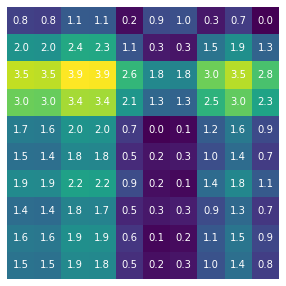

In [17]:
mat = cdist(Prova.iloc[0].values[:10].reshape(-1,1),Prova.iloc[1].values[:10].reshape(-1,1))

plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        text = plt.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")
        
plt.show()

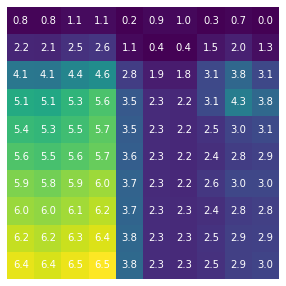

In [18]:
acc = subsequence_cost_matrix(Prova.iloc[0].values[:10].reshape(-1,1), Prova.iloc[1].values[:10].reshape(-1,1))

plt.imshow(acc)
plt.axis("off")
plt.autoscale(False)
for i in range(acc.shape[0]):
    for j in range(acc.shape[1]):
        text = plt.text(j, i, '%.1f' % np.sqrt(acc[i, j]), ha="center", va="center", color="w")
        
plt.show()

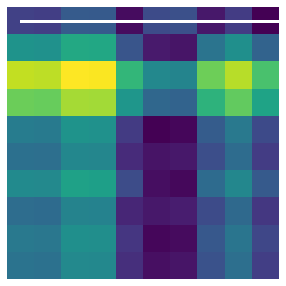

In [19]:
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

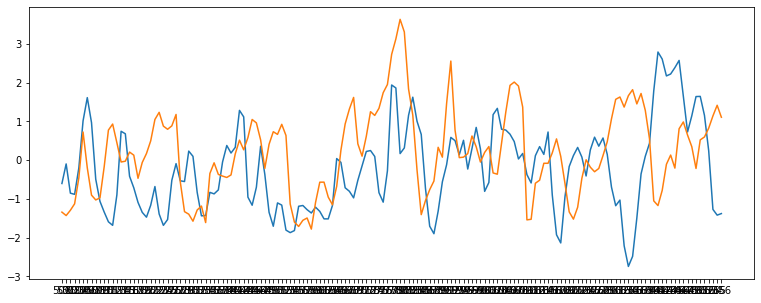

In [20]:
plt.plot(Prova.T[500:1400])
plt.show()

In [21]:
# PAA transform (and inverse transform) of the data
n_paa_segments = 100
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_paa = paa.fit_transform(Prova)
paa_dataset_inv = paa.inverse_transform(ts_paa)

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [22]:
Prova.shape

(2, 657)

In [23]:
Prova

,0,1,2,3,4,5,6,7,8,9,...,647,648,649,650,651,652,653,654,655,656
track_id,,,,,,,,,,,,,,,,,,,,,
2,-0.134461,1.091443,2.611349,2.097392,0.735365,0.544687,0.961243,0.489815,0.678479,0.583783,...,1.659076,0.728619,1.144180,1.641569,1.646186,1.155188,0.243829,-1.270410,-1.418964,-1.378548
5,-0.915597,-0.890180,-1.271114,-1.254090,0.034274,0.782003,0.836597,-0.421936,-0.856411,-0.172586,...,0.986330,0.646999,0.348132,-0.214028,0.523669,0.599232,0.826596,1.141205,1.416961,1.107621


In [24]:
ts_paa

array([[[ 1.15762934],
        [-0.05952049],
        [-0.80692572],
        [ 0.23906654],
        [-0.15187344],
        [ 0.58617603],
        [ 0.24992488],
        [-0.20734155],
        [ 0.80576904],
        [ 0.60142425],
        [ 0.05260477],
        [ 0.11116303],
        [ 0.71731206],
        [ 0.07577789],
        [-0.39903183],
        [-0.71940282],
        [ 1.55542149],
        [ 1.84045289],
        [ 0.40695429],
        [-0.75642249],
        [-0.72634334],
        [ 0.08462499],
        [ 0.39730804],
        [ 1.82613905],
        [-0.89787818],
        [-0.20704953],
        [ 0.15340896],
        [-0.4108616 ],
        [-0.46897644],
        [ 0.5239412 ],
        [-0.42682825],
        [ 0.51383009],
        [-0.04758784],
        [ 0.8053489 ],
        [ 0.74665963],
        [-0.50992793],
        [-0.2636613 ],
        [-1.45712161],
        [-0.10409094],
        [ 0.78708668],
        [-0.68043832],
        [ 0.08078978],
        [ 0.74507593],
        [ 0

In [25]:
new_Prova=ts_paa.squeeze()
new_Prova.shape

(2, 100)

In [26]:
columns=np.array(range(0,100,1))
columns


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [27]:
Prova_approx = pd.DataFrame(new_Prova, index=Prova.index,columns=columns)

In [28]:
Prova_approx

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
track_id,,,,,,,,,,,,,,,,,,,,,
2,1.157629,-0.059520,-0.806926,0.239067,-0.151873,0.586176,0.249925,-0.207342,0.805769,0.601424,...,0.133184,-0.810340,-1.501985,-1.367954,-0.612036,-0.157538,0.488396,0.337134,-0.466474,0.309785
5,-0.585784,-0.112675,0.459615,0.930047,-0.718602,0.570572,0.216445,0.798693,-0.784873,-0.816963,...,0.366451,0.513897,-0.738422,-1.075202,0.383845,0.813960,2.749679,-0.076951,0.776828,0.205648


In [29]:
new_Prova_2=paa_dataset_inv.squeeze()
new_Prova_2.shape


(2, 657)

In [30]:
Prova_approx_2 = pd.DataFrame(new_Prova_2, index=Prova.index,columns=Prova.columns)

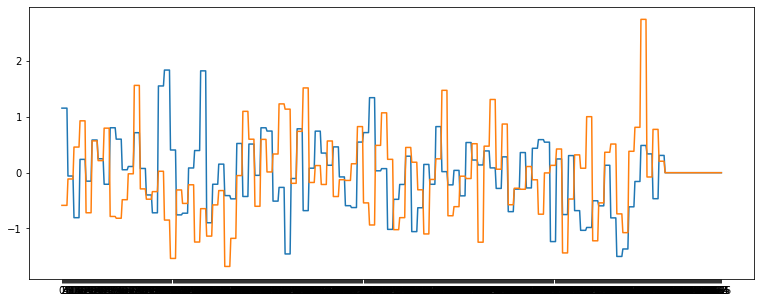

In [31]:
plt.plot(Prova_approx_2.T)
plt.show()

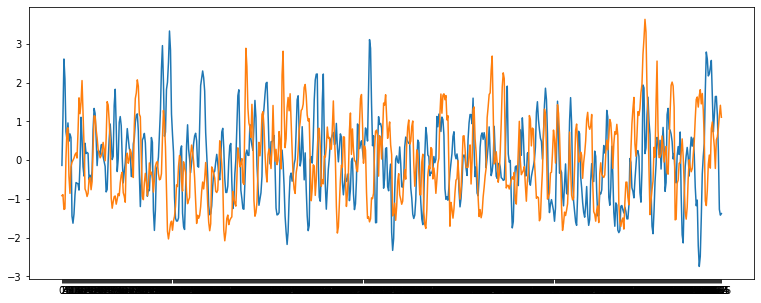

In [32]:
plt.plot(Prova.T)
plt.show()

In [33]:
dist = euclidean(Prova_approx.iloc[0],Prova_approx.iloc[1])
dist

10.15961483049714

In [34]:
dist = cityblock(Prova_approx.iloc[0],Prova_approx.iloc[1])
dist

79.0084238806733

In [35]:
dist = dtw(Prova_approx.iloc[0],Prova_approx.iloc[1])
dist

5.415014591614617

In [53]:
# SAX transform
n_paa_segments = 100
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols,scale=True)
ts_sax = sax.fit_transform(Prova)
sax_dataset_inv = sax.inverse_transform(ts_sax)

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [54]:

new_Prova_sax=ts_sax.squeeze()
new_Prova_sax.shape

(2, 100)

In [55]:
new_Prova_sax_2=sax_dataset_inv.squeeze()
new_Prova_sax_2

array([[ 1.53412054,  1.53412054,  1.53412054, ...,  0.        ,
         0.        ,  0.        ],
       [-0.48877641, -0.48877641, -0.48877641, ...,  0.        ,
         0.        ,  0.        ]])

In [56]:
Prova_sax = pd.DataFrame(new_Prova_sax, index =Prova.index,columns=columns)

In [57]:
Prova_sax_2 = pd.DataFrame(new_Prova_sax_2, index =Prova.index,columns=Prova.columns)

In [58]:
Prova_sax

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
track_id,,,,,,,,,,,,,,,,,,,,,
2,7,3,1,4,3,5,4,3,6,5,...,4,1,0,0,2,3,5,5,2,4
5,2,3,5,6,1,5,4,6,1,1,...,5,5,1,1,5,6,7,3,6,4


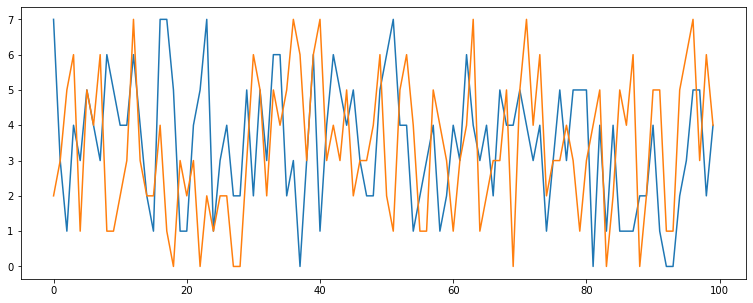

In [59]:
plt.plot(Prova_sax.T)
plt.show()

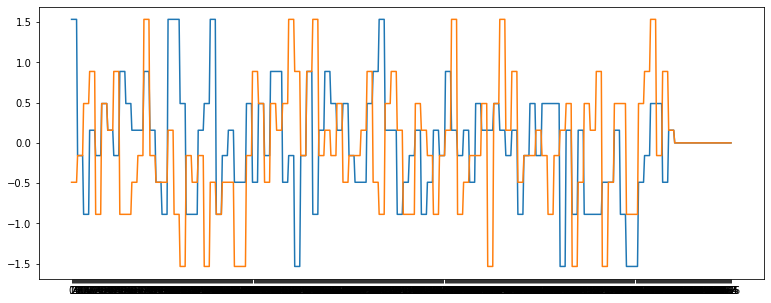

In [60]:
plt.plot(Prova_sax_2.T)
plt.show()

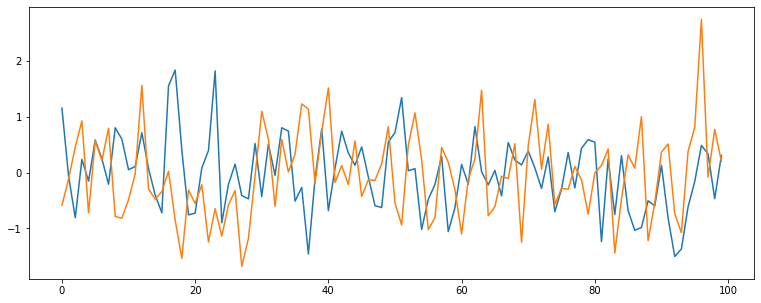

In [44]:
plt.plot(Prova_approx.T)
plt.show()

In [45]:
dist = euclidean(Prova_sax.iloc[0],Prova_sax.iloc[1])
dist

26.627053911388696

In [46]:
dist = cityblock(Prova_sax.iloc[0],Prova_sax.iloc[1])
dist

213

In [47]:
dist = dtw(Prova_sax.iloc[0],Prova_sax.iloc[1])
dist

13.341664064126334

In [77]:
columns=np.array(range(0,100,1))
columns

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

## CLUSTERING

In [78]:
# SAX transform
n_paa_segments = 100
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols,scale=True)
ts_sax = sax.fit_transform(df)
new_df_sax=ts_sax.squeeze()
df_sax = pd.DataFrame(new_df_sax, index =df.index,columns=columns)

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 3994 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [79]:
df_sax.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
track_id,,,,,,,,,,,,,,,,,,,,,
2,7,3,1,4,3,5,4,3,6,5,...,4,1,0,0,2,3,5,5,2,4
5,2,3,5,6,1,5,4,6,1,1,...,5,5,1,1,5,6,7,3,6,4
148,1,6,5,6,7,7,7,4,1,1,...,5,5,5,6,6,6,6,6,6,5
182,6,7,5,2,6,6,3,3,3,0,...,6,5,3,4,2,6,5,3,5,5
255,3,1,2,2,2,2,2,3,6,3,...,6,4,4,5,5,3,5,2,3,2


In [80]:
aaa=df_sax.iloc[0:4]
aaa

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
track_id,,,,,,,,,,,,,,,,,,,,,
2,7,3,1,4,3,5,4,3,6,5,...,4,1,0,0,2,3,5,5,2,4
5,2,3,5,6,1,5,4,6,1,1,...,5,5,1,1,5,6,7,3,6,4
148,1,6,5,6,7,7,7,4,1,1,...,5,5,5,6,6,6,6,6,6,5
182,6,7,5,2,6,6,3,3,3,0,...,6,5,3,4,2,6,5,3,5,5


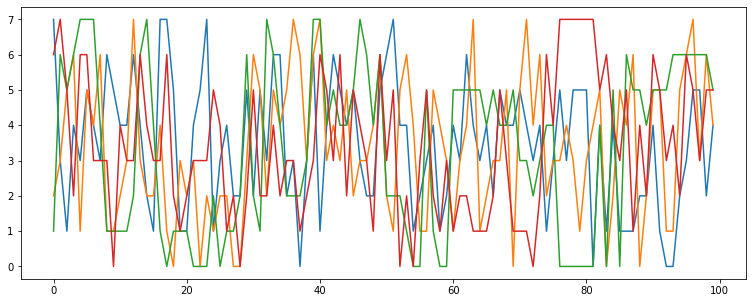

In [81]:
plt.plot(aaa.T)
plt.show()

In [77]:
sse_list = list()
sil_list = list()

max_k = 10
for k in range(2, max_k + 1):
    kmeans = TimeSeriesKMeans(n_clusters=k, metric="euclidean", random_state=0)
    kmeans.fit(df_sax)
    
    sil = silhouette_score(df_sax, kmeans.labels_)
    sse = kmeans.inertia_
    sse_list.append(sse)
    sil_list.append(sil)
    
    
    

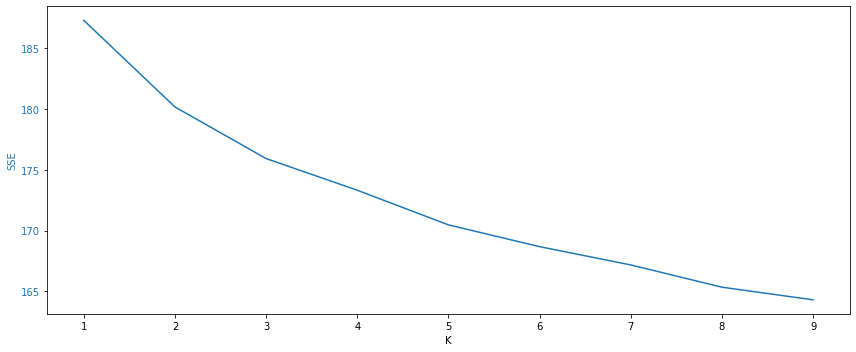

In [79]:
fig, ax1 = plt.subplots(figsize=(12, 5))
t = np.arange(1, 40, 1)
color = 'tab:blue'
ax1.set_xlabel('K')
ax1.set_ylabel('SSE', color=color)
ax1.plot(t, sse_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Silhouette', color=color)  # we already handled the x-label with ax1
ax2.plot(t, sil_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
kmeans = TimeSeriesKMeans(n_clusters=19, metric="euclidean", random_state=0)
kmeans.fit(df_sax)

In [55]:
kmeans.cluster_centers_.shape

(19, 100, 1)

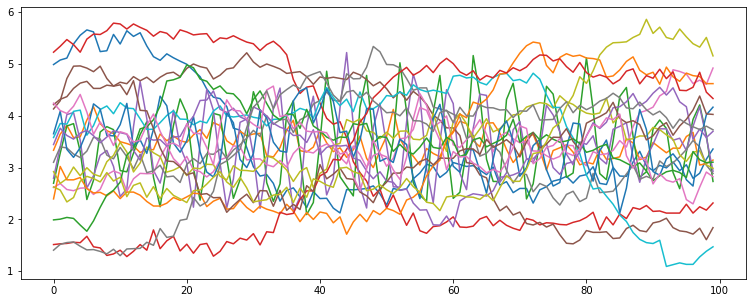

In [56]:
plt.plot(np.squeeze(kmeans.cluster_centers_).T)
plt.show()

In [57]:
kmeans.labels_

array([ 1,  1, 15, ...,  0,  6, 15], dtype=int64)

In [58]:
np.unique(kmeans.labels_,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18], dtype=int64),
 array([183, 510,  86, 123, 127, 176, 305, 195, 369, 174, 222, 182, 210,
        138, 200, 191, 267, 170, 166], dtype=int64))

In [71]:
# PAA transform (and inverse transform) of the data
n_paa_segments = 100
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_paa = paa.fit_transform(df)
new_df=ts_paa.squeeze()
df_approx = pd.DataFrame(new_df, index =df.index,columns=columns)

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 3994 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [60]:
sse_list = list()
sil_list = list()

max_k = 40
for k in range(2, max_k + 1):
    kmeans = TimeSeriesKMeans(n_clusters=k, metric="euclidean", random_state=0)
    kmeans.fit(df_approx)
    
    sil = silhouette_score(df_approx, kmeans.labels_)
    sse = kmeans.inertia_
    sse_list.append(sse)
    sil_list.append(sil)
    
    

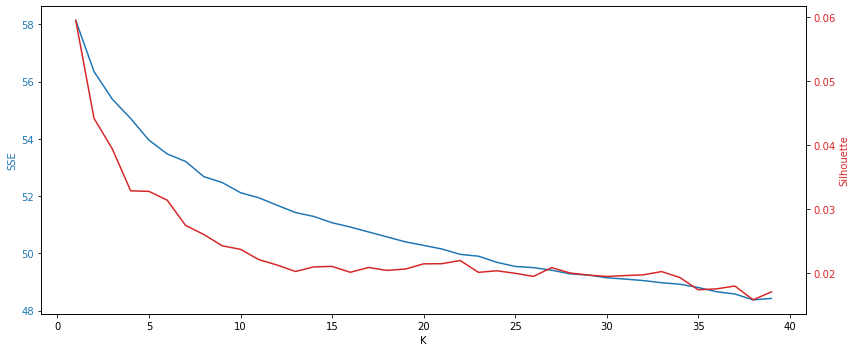

In [61]:
fig, ax1 = plt.subplots(figsize=(12, 5))
t = np.arange(1, 40, 1)
color = 'tab:blue'
ax1.set_xlabel('K')
ax1.set_ylabel('SSE', color=color)
ax1.plot(t, sse_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Silhouette', color=color)  # we already handled the x-label with ax1
ax2.plot(t, sil_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [72]:
%%time
kmeans = TimeSeriesKMeans(n_clusters=22, metric="euclidean", random_state=0)
kmeans.fit(df_approx)

Wall time: 8.83 s


TimeSeriesKMeans(n_clusters=22, random_state=0)

In [63]:
kmeans.cluster_centers_.shape

(22, 100, 1)

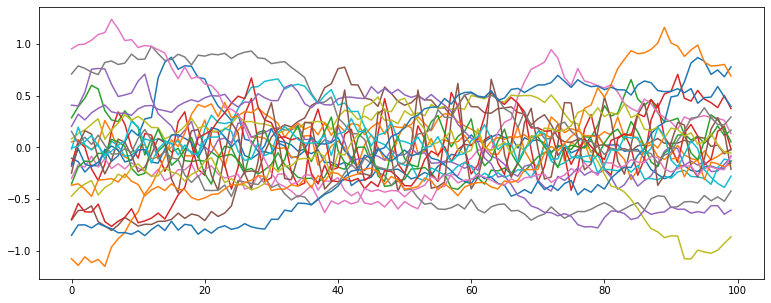

In [64]:
plt.plot(np.squeeze(kmeans.cluster_centers_).T)
plt.show()

In [65]:
kmeans.labels_

array([ 4, 15, 10, ...,  4, 12,  2], dtype=int64)

In [66]:
np.unique(kmeans.labels_,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21], dtype=int64),
 array([134, 371, 200, 158, 176, 158, 167, 114, 162, 195, 159, 110, 305,
         84, 177,  89, 130, 181, 222, 383, 159, 160], dtype=int64))

In [ ]:
metric_params={'global_constraint':'itakura','itakura_max_slope':4}

In [82]:
columns=np.array(range(0,60,1))

In [84]:
# SAX transform
n_paa_segments = 60
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols,scale=True)
ts_sax = sax.fit_transform(df)
new_df_sax=ts_sax.squeeze()
df_sax = pd.DataFrame(new_df_sax, index =df.index,columns=columns)
df_sax.shape

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 3994 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


(3994, 60)

In [76]:
%%time
sse_list = list()

max_k = 25
for k in range(2, max_k + 1):
    kmeans = TimeSeriesKMeans(n_clusters=k, metric="dtw", random_state=0,
                          metric_params={'global_constraint':'itakura','itakura_max_slope':4},n_jobs =-1)    
    kmeans.fit(df_sax)
        
    sse = kmeans.inertia_
    sse_list.append(sse)
    print(k)
    print(sse)
    

KeyboardInterrupt: 

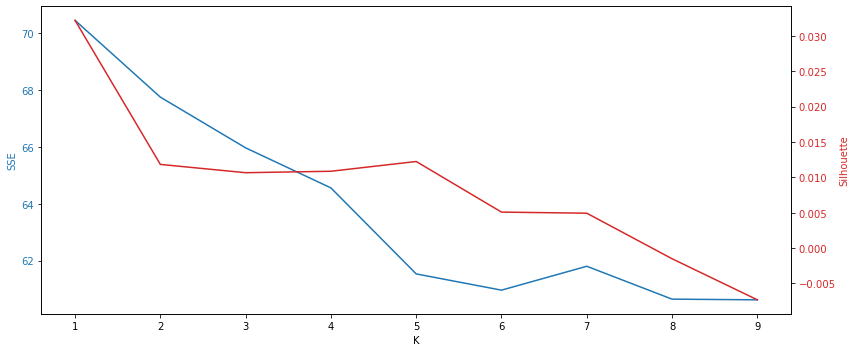

In [199]:
fig, ax1 = plt.subplots(figsize=(12, 5))
t = np.arange(1, 25, 1)
color = 'tab:blue'
ax1.set_xlabel('K')
ax1.set_ylabel('SSE', color=color)
ax1.plot(t, sse_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Silhouette', color=color)  # we already handled the x-label with ax1
ax2.plot(t, sil_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [67]:
kmeans = TimeSeriesKMeans(n_clusters=5, metric="dtw", random_state=0,
                          metric_params={'global_constraint':'sakoe_chiba','sakoe_chiba_radius':4},n_jobs =-1)
                             

In [85]:
%%time
kmeans = TimeSeriesKMeans(n_clusters=5, metric="dtw", random_state=0,
                          metric_params={'global_constraint':'sakoe_chiba','sakoe_chiba_radius':4},n_jobs =-1)
                             
kmeans.fit(df_sax)

Wall time: 5min 17s


TimeSeriesKMeans(metric='dtw',
                 metric_params={'global_constraint': 'sakoe_chiba',
                                'sakoe_chiba_radius': 4},
                 n_clusters=5, n_jobs=-1, random_state=0)

In [61]:
silhouette_score(df_sax, kmeans.labels_)


0.014035764441329888

In [63]:

kmeans = TimeSeriesKMeans(n_clusters=2, metric="dtw", random_state=0,
                          metric_params={'global_constraint':'itakura','itakura_max_slope':1},n_jobs =-1)
                             
kmeans.fit(df_sax)

TimeSeriesKMeans(metric='dtw',
                 metric_params={'global_constraint': 'itakura',
                                'itakura_max_slope': 1},
                 n_clusters=2, n_jobs=-1, random_state=0)

In [59]:
kmeans = TimeSeriesKMeans(n_clusters=5, metric="dtw", random_state=0,
                          metric_params={'global_constraint':'itakura','itakura_max_slope':3},n_jobs =-1)
                             
kmeans.fit(df_sax)

KeyboardInterrupt: 

In [ ]:
silhouette_score(df_sax, kmeans.labels_)


In [ ]:
kmeans.cluster_centers_.shape

In [ ]:
plt.plot(np.squeeze(kmeans.cluster_centers_).T)
plt.show()

In [ ]:
kmeans.labels_

In [ ]:
np.unique(kmeans.labels_,return_counts=True)

In [203]:
# PAA transform (and inverse transform) of the data
n_paa_segments = 60
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_paa = paa.fit_transform(df)
new_df=ts_paa.squeeze()
df_approx = pd.DataFrame(new_df, index =df.index,columns=columns)


C:\Users\Federico\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 3994 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [167]:
sse_list = list()
sil_list = list()

max_k = 20
for k in range(2, max_k + 1):
    kmeans = TimeSeriesKMeans(n_clusters=k, metric="dtw",random_state=0)
    kmeans.fit(df_approx)
    
    sil = silhouette_score(df_approx, kmeans.labels_)
    sse = kmeans.inertia_
    sse_list.append(sse)
    sil_list.append(sil)
    
    

KeyboardInterrupt: 

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 5))
t = np.arange(1, 40, 1)
color = 'tab:blue'
ax1.set_xlabel('K')
ax1.set_ylabel('SSE', color=color)
ax1.plot(t, sse_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Silhouette', color=color)  # we already handled the x-label with ax1
ax2.plot(t, sil_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [136]:
kmeans = TimeSeriesKMeans(n_clusters=3, metric="dtw", random_state=0)
kmeans.fit(df_approx)

TimeSeriesKMeans(max_iter=1, metric='dtw', random_state=0)

In [ ]:
kmeans.cluster_centers_.shape

In [ ]:
plt.plot(np.squeeze(kmeans.cluster_centers_).T)
plt.show()

In [ ]:
kmeans.labels_

In [ ]:
np.unique(kmeans.labels_,return_counts=True)

In [3]:
columnsFeatures=['avg','std','var','med','10p','25p','50p','75p','90p','iqr','cov','skw','kur']

In [4]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }

    return features

In [18]:
features = calculate_features(df.T)

In [23]:
df_feat=pd.DataFrame(index =df.index,columns=columnsFeatures)

In [24]:
df_feat

,avg,std,var,med,10p,25p,50p,75p,90p,iqr,cov,skw,kur
track_id,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
for track in df.index:
    features=calculate_features(df.loc[track])
    df_feat.loc[track]=list(features.values())

In [26]:
df_feat

,avg,std,var,med,10p,25p,50p,75p,90p,iqr,cov,skw,kur
track_id,,,,,,,,,,,,,
2,-2.53476e-17,1,1,0.012986,-1.31887,-0.697471,0.012986,0.595689,1.19036,1.29316,-2.53476e-17,0.302632,0.153479
5,-4.32598e-17,1,1,-0.0703022,-1.27855,-0.761441,-0.0703022,0.653864,1.34932,1.41531,-4.32598e-17,0.392194,-0.110358
148,-5.42607e-16,1,1,0.202402,-1.35615,-0.84565,0.202402,0.715365,1.06946,1.56102,-5.42607e-16,-0.0743908,-0.586615
182,-8.80574e-16,1,1,-0.0579018,-1.23025,-0.730492,-0.0579018,0.639772,1.31092,1.37026,-8.80574e-16,0.342761,-0.027788
255,-2.70374e-17,1,1,-0.034632,-0.917371,-0.536897,-0.034632,0.456362,1.10372,0.993259,-2.70374e-17,0.432317,3.28427
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154306,-5.69475e-16,1,1,-0.254907,-1.09727,-0.757089,-0.254907,0.743509,1.58947,1.5006,-5.69475e-16,0.672587,-0.628462
154307,-8.17881e-17,1,1,-0.172767,-1.14347,-0.580566,-0.172767,0.383511,1.70074,0.964077,-8.17881e-17,0.701651,0.158221
154308,-4.65212e-16,1,1,-0.142558,-1.00467,-0.30974,-0.142558,0.0976064,1.62974,0.407346,-4.65212e-16,1.01551,1.52822


In [19]:
df.T.mean()

track_id
2        -2.534756e-17
5        -4.325983e-17
148      -5.426067e-16
182      -8.805742e-16
255      -2.703739e-17
              ...     
154306   -5.694751e-16
154307   -8.178812e-17
154308   -4.652122e-16
154309    1.322298e-16
155066    1.973730e-16
Length: 3994, dtype: float64

In [20]:
features

{'avg': track_id
 2        -2.534756e-17
 5        -4.325983e-17
 148      -5.426067e-16
 182      -8.805742e-16
 255      -2.703739e-17
               ...     
 154306   -5.694751e-16
 154307   -8.178812e-17
 154308   -4.652122e-16
 154309    1.322298e-16
 155066    1.973730e-16
 Length: 3994, dtype: float64,
 'std': track_id
 2         1.0
 5         1.0
 148       1.0
 182       1.0
 255       1.0
          ... 
 154306    1.0
 154307    1.0
 154308    1.0
 154309    1.0
 155066    1.0
 Length: 3994, dtype: float64,
 'var': track_id
 2         1.0
 5         1.0
 148       1.0
 182       1.0
 255       1.0
          ... 
 154306    1.0
 154307    1.0
 154308    1.0
 154309    1.0
 155066    1.0
 Length: 3994, dtype: float64,
 'med': -0.07430374025182662,
 '10p': -1.2005895045069677,
 '25p': -0.7087155833847572,
 '50p': -0.07430374025182662,
 '75p': 0.6446075228444449,
 '90p': 1.3021519099267322,
 'iqr': 1.353323106229202,
 'cov': track_id
 2        -2.534756e-17
 5        -4.325983e

In [21]:
df_features = pd.DataFrame(features, index =df.index,columns=columnsFeatures)

In [22]:
df_features

,avg,std,var,med,10p,25p,50p,75p,90p,iqr,cov,skw,kur
track_id,,,,,,,,,,,,,
2,-2.534756e-17,1.0,1.0,-0.074304,-1.20059,-0.708716,-0.074304,0.644608,1.302152,1.353323,-2.534756e-17,0.302632,0.153479
5,-4.325983e-17,1.0,1.0,-0.074304,-1.20059,-0.708716,-0.074304,0.644608,1.302152,1.353323,-4.325983e-17,0.392194,-0.110358
148,-5.426067e-16,1.0,1.0,-0.074304,-1.20059,-0.708716,-0.074304,0.644608,1.302152,1.353323,-5.426067e-16,-0.074391,-0.586615
182,-8.805742e-16,1.0,1.0,-0.074304,-1.20059,-0.708716,-0.074304,0.644608,1.302152,1.353323,-8.805742e-16,0.342761,-0.027788
255,-2.703739e-17,1.0,1.0,-0.074304,-1.20059,-0.708716,-0.074304,0.644608,1.302152,1.353323,-2.703739e-17,0.432317,3.284271
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154306,-5.694751e-16,1.0,1.0,-0.074304,-1.20059,-0.708716,-0.074304,0.644608,1.302152,1.353323,-5.694751e-16,0.672587,-0.628462
154307,-8.178812e-17,1.0,1.0,-0.074304,-1.20059,-0.708716,-0.074304,0.644608,1.302152,1.353323,-8.178812e-17,0.701651,0.158221
154308,-4.652122e-16,1.0,1.0,-0.074304,-1.20059,-0.708716,-0.074304,0.644608,1.302152,1.353323,-4.652122e-16,1.015514,1.528222


In [27]:
scaler = StandardScaler()
X = scaler.fit_transform(df_feat.values)

In [30]:
sse_list = list()
sil_list = list()
max_k = 41
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(X)
    

    sse = kmeans.inertia_
    sil = silhouette_score(X, kmeans.labels_)
    sse_list.append(sse)
    sil_list.append(sil)

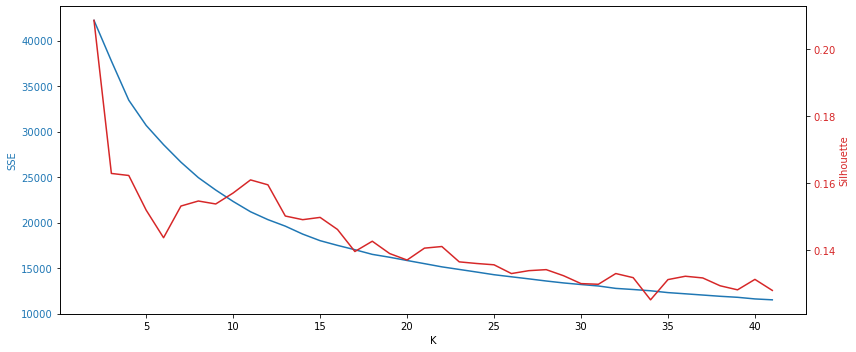

In [33]:
fig, ax1 = plt.subplots(figsize=(12, 5))
t = np.arange(2, 42, 1)
color = 'tab:blue'
ax1.set_xlabel('K')
ax1.set_ylabel('SSE', color=color)
ax1.plot(t, sse_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Silhouette', color=color)  # we already handled the x-label with ax1
ax2.plot(t, sil_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [34]:
kmeans = KMeans(n_clusters=11, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=11, random_state=0)

In [35]:
kmeans.cluster_centers_.shape

(11, 13)

In [36]:
centers=kmeans.cluster_centers_
centers

array([[ 8.29949407e-02, -3.95342598e-01, -3.10222118e-01,
        -6.57464120e-01,  1.47769122e+00,  9.98374948e-01,
        -6.57464120e-01, -1.91519251e+00, -1.35958035e+00,
        -1.77385675e+00,  8.29949407e-02,  1.69184803e+00,
         5.98719411e-01],
       [-1.54202507e-02,  7.93456564e-01,  8.90589517e-01,
         6.25198170e-02, -1.33726296e-01, -5.81162540e-02,
         6.25198170e-02,  6.92543501e-02,  3.65747172e-02,
         7.49862406e-02, -1.54202507e-02, -7.20380608e-02,
        -6.64693234e-02],
       [-2.00387935e+00, -9.89150755e-02, -7.81542723e-03,
         3.62236391e-01, -2.70968190e-01,  2.67999176e-01,
         3.62236391e-01,  1.44617474e-01, -2.18451786e-01,
        -3.51812103e-02, -2.00387935e+00, -3.79942327e-01,
        -6.66167729e-02],
       [-9.63036613e-01, -5.37316460e-02, -5.29044305e-02,
        -2.25709663e-01,  2.98975842e+00,  2.30223664e+00,
        -2.25709663e-01, -1.91937491e+00, -3.33196877e+00,
        -2.41883954e+00, -9.63036613e

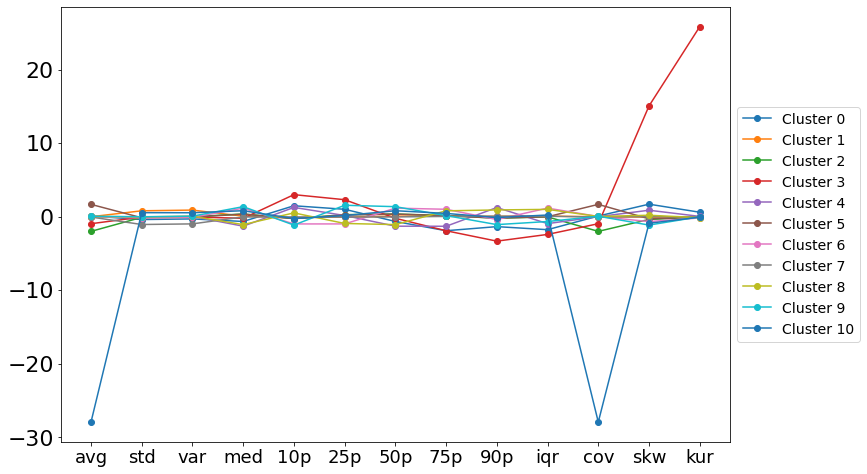

In [37]:
plt.figure(figsize=(12, 8))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(df_features.columns)), df_features.columns, fontsize=18)
plt.legend(loc='center left', prop=dict(size=14),bbox_to_anchor=(1, 0.5))

plt.show()

In [38]:
kmeans.labels_

array([1, 1, 6, ..., 0, 8, 0])

In [39]:
np.unique(kmeans.labels_,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([246, 837, 220,   5, 423, 279, 467, 694, 468, 354,   1], dtype=int64))

In [40]:
tracks = utils.load('data/fma_metadata/tracks.csv')

In [41]:
tracks=tracks[[('track','genre_top')]]

In [42]:
tracks.columns = tracks.columns.droplevel(0)


In [43]:
tracks.head()

,genre_top
track_id,
2,Hip-Hop
3,Hip-Hop
5,Hip-Hop
10,Pop
20,NaN


In [44]:
TS= pd.merge(tracks, df, left_index=True, right_index=True)
TS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3994 entries, 2 to 155066
Columns: 658 entries, genre_top to 656
dtypes: category(1), float64(657)
memory usage: 20.1 MB


In [45]:
TS.head()

,genre_top,0,1,2,3,4,5,6,7,8,...,647,648,649,650,651,652,653,654,655,656
track_id,,,,,,,,,,,,,,,,,,,,,
2,Hip-Hop,-0.134461,1.091443,2.611349,2.097392,0.735365,0.544687,0.961243,0.489815,0.678479,...,1.659076,0.728619,1.144180,1.641569,1.646186,1.155188,0.243829,-1.270410,-1.418964,-1.378548
5,Hip-Hop,-0.915597,-0.890180,-1.271114,-1.254090,0.034274,0.782003,0.836597,-0.421936,-0.856411,...,0.986330,0.646999,0.348132,-0.214028,0.523669,0.599232,0.826596,1.141205,1.416961,1.107621
148,Experimental,-1.398620,-1.179364,-0.760749,-0.668556,-0.215774,-0.222921,-0.153197,0.265194,0.854607,...,0.799620,0.773268,0.810048,0.704623,0.624920,0.619605,0.644483,0.689480,0.706873,0.508055
182,Rock,0.831877,0.867620,1.211251,1.300045,1.009059,0.776468,1.445092,1.928781,2.086341,...,-0.231961,0.177564,0.976858,1.312150,0.890539,0.194135,0.318079,0.535572,0.486992,0.594535
255,Rock,-0.001086,-0.109745,-0.149553,-0.249814,-0.338598,-0.294437,-0.167429,-0.541922,-0.708239,...,-0.579852,-1.053090,-1.056643,-0.359074,0.243012,0.159436,-0.013340,-0.244169,-0.727907,-1.238562


In [46]:
TS['cluster']=kmeans.labels_

In [47]:
TS.head()

,genre_top,0,1,2,3,4,5,6,7,8,...,648,649,650,651,652,653,654,655,656,cluster
track_id,,,,,,,,,,,,,,,,,,,,,
2,Hip-Hop,-0.134461,1.091443,2.611349,2.097392,0.735365,0.544687,0.961243,0.489815,0.678479,...,0.728619,1.144180,1.641569,1.646186,1.155188,0.243829,-1.270410,-1.418964,-1.378548,1
5,Hip-Hop,-0.915597,-0.890180,-1.271114,-1.254090,0.034274,0.782003,0.836597,-0.421936,-0.856411,...,0.646999,0.348132,-0.214028,0.523669,0.599232,0.826596,1.141205,1.416961,1.107621,1
148,Experimental,-1.398620,-1.179364,-0.760749,-0.668556,-0.215774,-0.222921,-0.153197,0.265194,0.854607,...,0.773268,0.810048,0.704623,0.624920,0.619605,0.644483,0.689480,0.706873,0.508055,6
182,Rock,0.831877,0.867620,1.211251,1.300045,1.009059,0.776468,1.445092,1.928781,2.086341,...,0.177564,0.976858,1.312150,0.890539,0.194135,0.318079,0.535572,0.486992,0.594535,2
255,Rock,-0.001086,-0.109745,-0.149553,-0.249814,-0.338598,-0.294437,-0.167429,-0.541922,-0.708239,...,-1.053090,-1.056643,-0.359074,0.243012,0.159436,-0.013340,-0.244169,-0.727907,-1.238562,0


In [48]:
uno=TS.loc[TS['cluster']==9]

In [49]:
uno['genre_top'].value_counts()

Rock                   132
Electronic              97
Experimental            76
Hip-Hop                 49
Spoken                   0
Soul-RnB                 0
Pop                      0
Old-Time / Historic      0
Jazz                     0
International            0
Instrumental             0
Folk                     0
Easy Listening           0
Country                  0
Classical                0
Blues                    0
Name: genre_top, dtype: int64

In [61]:
n_paa_segments = 50
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(df)

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 3994 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [62]:
%%time

kmeans= TimeSeriesKMeans(n_clusters=4, metric='dtw', n_jobs=-1,
                         metric_params={'global_constraint': 'sakoe_chiba', 'sakoe_chiba_radius': 10})
kmeans.fit(ts_sax)


Wall time: 3min 51s


TimeSeriesKMeans(metric='dtw',
                 metric_params={'global_constraint': 'sakoe_chiba',
                                'sakoe_chiba_radius': 10},
                 n_clusters=4, n_jobs=-1)

In [64]:
ts_sax.shape

(3994, 50, 1)

In [69]:
# SAX transform
columns=np.array(range(0,50,1))
n_paa_segments = 50
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols,scale=True)
ts_sax = sax.fit_transform(df)
new_df_sax=ts_sax.squeeze()


C:\Users\Federico\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 3994 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [70]:
new_df_sax.shape

(3994, 50)

In [71]:
%%time

kmeans= TimeSeriesKMeans(n_clusters=4, metric='dtw', n_jobs=-1,
                         metric_params={'global_constraint': 'sakoe_chiba', 'sakoe_chiba_radius': 10})
kmeans.fit(new_df_sax)


Wall time: 3min 39s


TimeSeriesKMeans(metric='dtw',
                 metric_params={'global_constraint': 'sakoe_chiba',
                                'sakoe_chiba_radius': 10},
                 n_clusters=4, n_jobs=-1)

In [72]:
%%time

kmeans = TimeSeriesKMeans(n_clusters=4, metric="dtw", random_state=0,
                          metric_params={'global_constraint':'sakoe_chiba','sakoe_chiba_radius':10},n_jobs =-1)
kmeans.fit(new_df_sax)

Wall time: 4min 14s


TimeSeriesKMeans(metric='dtw',
                 metric_params={'global_constraint': 'sakoe_chiba',
                                'sakoe_chiba_radius': 10},
                 n_clusters=4, n_jobs=-1, random_state=0)

In [90]:
# SAX transform
columns=np.array(range(0,50,1))
n_paa_segments = 50
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols,scale=True)
ts_sax = sax.fit_transform(df)
new_df_sax=ts_sax.squeeze()
df_sax = pd.DataFrame(new_df_sax, index =df.index,columns=columns)

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 3994 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [91]:
df_sax.shape

(3994, 50)

In [92]:
%%time

kmeans = TimeSeriesKMeans(n_clusters=4, metric="dtw", random_state=0,
                          metric_params={'global_constraint':'sakoe_chiba','sakoe_chiba_radius':10},n_jobs =-1)
kmeans.fit(df_sax)

Wall time: 4min 16s


TimeSeriesKMeans(metric='dtw',
                 metric_params={'global_constraint': 'sakoe_chiba',
                                'sakoe_chiba_radius': 10},
                 n_clusters=4, n_jobs=-1, random_state=0)

In [101]:
%%time

kmeans = TimeSeriesKMeans(n_clusters=4, metric="dtw", random_state=0,
                          metric_params={'global_constraint':'itakura','itakura_max_slope':1.0},n_jobs =-1)
kmeans.fit(df_sax)

KeyboardInterrupt: 

In [ ]:
dtw_matrix=cdist_dtw(df_sax,global_constraint='itakura',itakura_max_slope=10,n_jobs=-1)